<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/HyperTuning_In_ML/HyperTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hypertuning in machine learning

Hyperparameter tuning in machine learning is the process of systematically finding the best external configuration settings (hyperparameters) for a model before training to maximize its performance, accuracy, and ability to generalize to new data.

Unlike model parameters (like weights) that are learned from the data during training, hyperparameters control the learning process itself, and their optimal values are found through an experimental process of testing different combinations to achieve the best results on a given task.

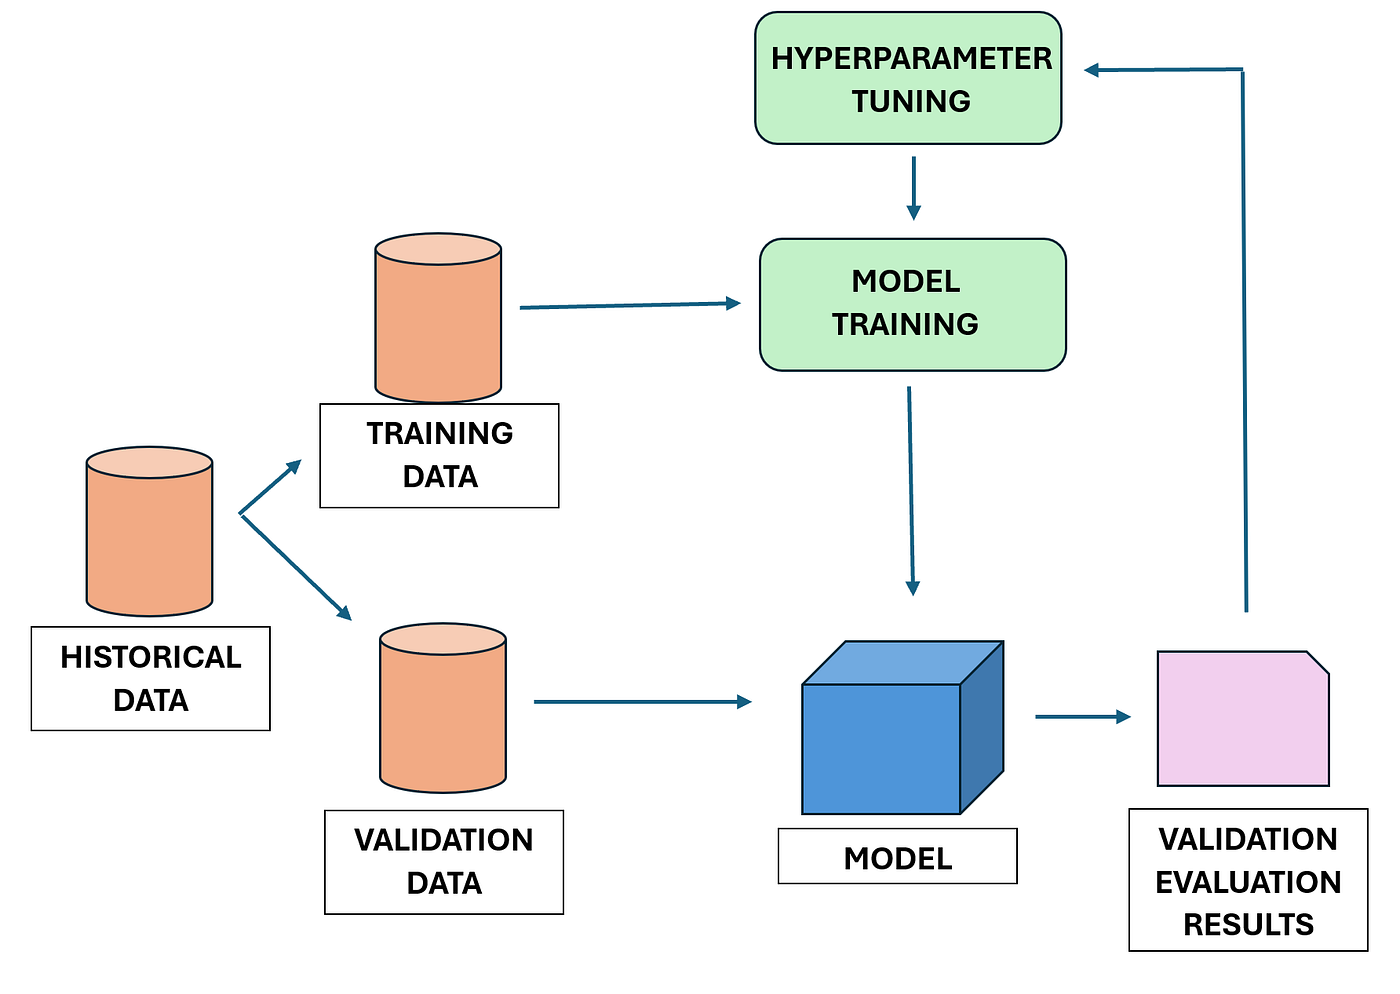

# Task
Generate Python code in multiple cells to demonstrate hyperparameter tuning for an SVM model on the scikit-learn house price dataset. The code should include: 1. Training and evaluating an SVM model with default hyperparameters. 2. Using GridSearchCV to find the best hyperparameters. 3. Training and evaluating an SVM model with the best hyperparameters. Include proper handling and comments in the code.

## Load data

### Subtask:
Load the house price dataset from scikit-learn.


**Reasoning**:
Import the necessary function and load the dataset as instructed.



In [2]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()

## Prepare data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as requested.



In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training data shape: (16512, 8)
Testing data shape: (4128, 8)
Training target shape: (16512,)
Testing target shape: (4128,)


## Untuned model

### Subtask:
Train an SVM model with default hyperparameters on the training data and evaluate its performance on the test data.


**Reasoning**:
Train an SVR model with default hyperparameters and evaluate its performance using MSE.



In [4]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate an SVR model with default hyperparameters
svr_default = SVR()

# Train the SVR model on the training data
svr_default.fit(X_train, y_train)

# Make predictions on the test data
y_pred_default = svr_default.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the predictions
mse_default = mean_squared_error(y_test, y_pred_default)

# Print the calculated MSE
print(f"Mean Squared Error (MSE) with default hyperparameters: {mse_default:.4f}")

Mean Squared Error (MSE) with default hyperparameters: 1.3320


## Hyperparameter tuning

### Subtask:
Define the parameter grid for SVM and use GridSearchCV to find the best hyperparameters on the training data.


**Reasoning**:
Import GridSearchCV, define the parameter grid, instantiate GridSearchCV, and fit it to the training data.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

## Tuned model

### Subtask:
Train an SVM model with the best hyperparameters found in the previous step on the training data and evaluate its performance on the test data.


**Reasoning**:
Train an SVM model with the best hyperparameters found in the previous step on the training data and evaluate its performance on the test data by instantiating a new SVR model with the best parameters, fitting it to the training data, making predictions on the test data, and calculating the mean squared error.



In [ ]:
# Instantiate a new SVR model using the best hyperparameters
svr_tuned = SVR(**grid_search.best_params_)

# Train the new SVR model on the entire training dataset
svr_tuned.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_tuned = svr_tuned.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the predictions on the test data
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

# Print the calculated MSE for the tuned model
print(f"Mean Squared Error (MSE) with tuned hyperparameters: {mse_tuned:.4f}")

## Compare results

### Subtask:
Compare the performance metrics (e.g., accuracy, mean squared error) of the untuned and tuned models.


**Reasoning**:
Print the comparison of the MSE values for the untuned and tuned models and provide an interpretation.



In [ ]:
# Print the comparison of MSE values
print("\n--- Model Performance Comparison ---")
print(f"Mean Squared Error (MSE) with default hyperparameters: {mse_default:.4f}")
print(f"Mean Squared Error (MSE) with tuned hyperparameters: {mse_tuned:.4f}")

# Interpret the comparison
print("\n--- Interpretation ---")
if mse_tuned < mse_default:
    print("The tuned model performed better than the untuned model as its MSE is lower.")
elif mse_tuned > mse_default:
    print("The tuned model performed worse than the untuned model as its MSE is higher.")
else:
    print("The untuned and tuned models performed similarly.")